Train on 162 samples, validate on 18 samples
Epoch 1/50
162/162 [==============================] - 8s 47ms/step - loss: 4.9397 - acc: 0.3642 - val_loss: 4.0713 - val_acc: 0.3889

Epoch 00001: val_acc improved from -inf to 0.38889, saving model to weights_cnn_model5_1.h5
Epoch 2/50
162/162 [==============================] - 4s 27ms/step - loss: 3.5913 - acc: 0.3889 - val_loss: 3.2215 - val_acc: 0.3333

Epoch 00002: val_acc did not improve from 0.38889
Epoch 3/50
162/162 [==============================] - 4s 27ms/step - loss: 2.9091 - acc: 0.3889 - val_loss: 2.7119 - val_acc: 0.3889

Epoch 00003: val_acc did not improve from 0.38889
Epoch 4/50
162/162 [==============================] - 5s 28ms/step - loss: 2.5254 - acc: 0.3951 - val_loss: 2.3863 - val_acc: 0.3333

Epoch 00004: val_acc did not improve from 0.38889
Epoch 5/50
162/162 [==============================] - 5s 28ms/step - loss: 2.2275 - acc: 0.4074 - val_loss: 2.1631 - val_acc: 0.3333

Epoch 00005: val_acc did not improve from 0


Epoch 00043: val_acc did not improve from 0.72222
Epoch 44/50
162/162 [==============================] - 4s 27ms/step - loss: 0.8909 - acc: 0.5864 - val_loss: 0.9794 - val_acc: 0.5556

Epoch 00044: val_acc did not improve from 0.72222
Epoch 45/50
162/162 [==============================] - 5s 28ms/step - loss: 0.8934 - acc: 0.5617 - val_loss: 0.9412 - val_acc: 0.6111

Epoch 00045: val_acc did not improve from 0.72222
Epoch 46/50
162/162 [==============================] - 5s 28ms/step - loss: 0.8641 - acc: 0.5556 - val_loss: 0.9796 - val_acc: 0.5000

Epoch 00046: val_acc did not improve from 0.72222
Epoch 47/50
162/162 [==============================] - 5s 28ms/step - loss: 0.8555 - acc: 0.6111 - val_loss: 1.0035 - val_acc: 0.5000

Epoch 00047: val_acc did not improve from 0.72222
Epoch 48/50
162/162 [==============================] - 5s 29ms/step - loss: 0.8666 - acc: 0.5864 - val_loss: 0.8639 - val_acc: 0.6667

Epoch 00048: val_acc did not improve from 0.72222
Epoch 49/50
162/162 [===

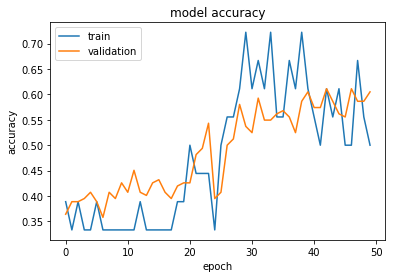

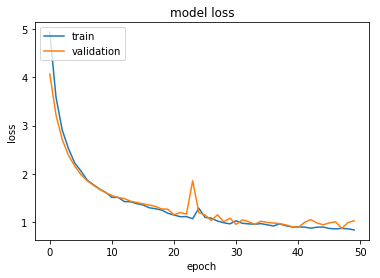

{0: 0.8645833333333334}
{0: 0.8645833333333334, 1: 0.989010989010989}
{0: 0.8645833333333334, 1: 0.989010989010989, 2: 0.9733333333333334}


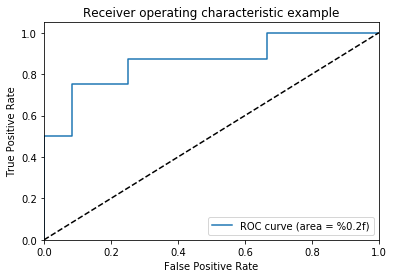

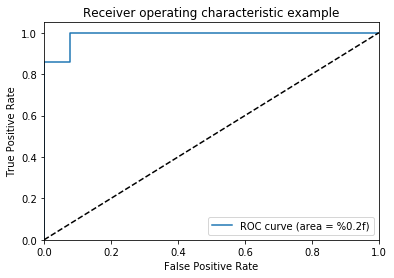

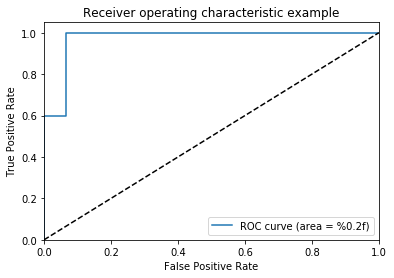

In [42]:
#from numpy.random import seed
#seed(1)
#from tensorflow import set_random_seed
#set_random_seed(2)

import numpy as np
import tensorflow as tf
import random as rn
import os
os.environ['PYTHONHASHSEED']='0'
#setting the seed nupy generator random number
np.random.seed(18)
#setting the seed for python random numbers
rn.seed(19)
#setting the seed for tensorflow
tf.set_random_seed(20)
from keras import backend as k

#force tensorflow to use a single thread
session_conf = tf.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
sess = tf.Session(graph=tf.get_default_graph(), config=session_conf)
k.set_session(sess)


import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from sklearn.model_selection import train_test_split
import pickle
from keras.callbacks import ModelCheckpoint
import sklearn
from sklearn.metrics import roc_curve, auc
# importing the libraries
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from glob import glob
from keras.preprocessing.image import ImageDataGenerator
#from keras.applications.vgg16 import preprocess_input
#from keras.models import Sequential
#from keras.applications import VGG16 
#from keras.layers import Activation, Dense
import os


from keras.preprocessing.image import ImageDataGenerator

import keras 
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Flatten
from keras.callbacks import TensorBoard
# more info on callbakcs: https://keras.io/callbacks/ model saver is cool too.
from tensorflow.keras.callbacks import TensorBoard

import matplotlib.pyplot as plt
import time
from keras.layers import Conv2D
from keras.regularizers import l2

NAME = "CNN-kaggel-dataset-50epochs-2dropout-4cov2d-x200-30%split-184_42_64-7x7-no-dense"

tensorboard = TensorBoard(log_dir="logs/{}".format(NAME))




pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

X = X/255.0

pickle_in = open("X_test.pickle","rb")
X_test = pickle.load(pickle_in)

pickle_in = open("y_test.pickle","rb")
y_test = pickle.load(pickle_in)

X_test = X_test/255.0


# Convert labels to categorical one-hot encoding
one_hot_labels = keras.utils.to_categorical(y, num_classes=3)
y_test= keras.utils.to_categorical(y_test, num_classes=3)


model = Sequential()

model.add(Conv2D(560, (3, 3), activation ='relu', input_shape=(200, 200, 3), 
                 kernel_regularizer=l2(0.005 ), 
                 bias_regularizer=l2(0.005 )
                ))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(280, (3, 3), activation ='relu', kernel_regularizer=l2(0.005 ), bias_regularizer=l2(0.005 )))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(140, (3, 3), activation ='relu', kernel_regularizer=l2(0.005 ), bias_regularizer=l2(0.005 )))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Dropout(0.5))

model.add(Conv2D(70, (3, 3), activation ='relu', kernel_regularizer=l2(0.005 ), bias_regularizer=l2(0.005 )))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.45))
model.add(Conv2D(32, (3, 3), strides = 1, activation ='relu', kernel_regularizer=l2(0.005 ), bias_regularizer=l2(0.005 )))
model.add(MaxPool2D(pool_size=(2, 2)))
#model.add(Dropout(0.1))
model.add(Flatten())
model.add(Dense(32, activation ='relu', kernel_regularizer=l2(0.005 ), bias_regularizer=l2(0.005 )))
model.add(Dense(100, activation ='relu', kernel_regularizer=l2(0.005 ), bias_regularizer=l2(0.005 )))
model.add(Dense(200, activation ='relu', kernel_regularizer=l2(0.005 ), bias_regularizer=l2(0.005 )))

#model.add(Dropout(0.2))
model.add(Dense(3, activation ='softmax'))


model.compile(loss='categorical_crossentropy',
                          optimizer='adam',
                          metrics=['accuracy'],
                          #shuffle=False
                          )
#model.load_weights('weights_cnn_model4_11.h5')
#model.load_weights('weights_cnn_model5_1.h5')
#X_train, X_test, y_train, y_test = train_test_split(X,one_hot_labels,test_size=0.1,shuffle=False)

cb= ModelCheckpoint(filepath='weights_cnn_model5_1.h5',  verbose=1, monitor='val_acc', save_best_only=True, save_weights_only=True)

history=model.fit(X, 
                  one_hot_labels,
                  batch_size=10,
                  epochs=50,
                  validation_split=0.1,
                  shuffle=True,
                  callbacks=[cb]
                     )



score, acc=model.evaluate( X_test, y_test)
print('Test loss')
print(score)
print('Test accuracy')
print(acc)

y_pred = model.predict_proba(X_test)
auc_value=sklearn.metrics.roc_auc_score(y_test, y_pred)
print('roc_auc_score')
print(auc_value)



#score,acc=model.evaluate(X)

print(history.history.keys())

plt.plot(history.history['val_acc'])
plt.plot(history.history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):
        fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
        print(roc_auc)
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot of a ROC curve for a specific class
for i in range(3):
        plt.figure()
        plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)'.format(roc_auc[i]))
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver operating characteristic example')
        plt.legend(loc="lower right")
        plt.show()
